# Ejercicio 2

Extender el autoencoder para que opere como un Autoencoder Variacional.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys; sys.path.append("..")
from src.utils import read_data

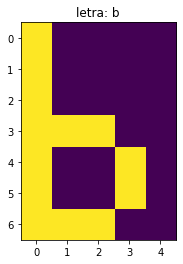

In [8]:
data_dict = read_data("../data/font.csv")
letra = "b"
plt.imshow(data_dict[letra])
plt.title("letra: " + letra)
plt.show()

In [9]:
from src.optimizer import Adam
from src.autoencoder import Autoencoder
from src.perceptron_multicapa import StochasticLayer, Layer

vae = Autoencoder([
    Layer(35, 20, "sigmoid"),
    Layer(20,  6, "sigmoid"),
    StochasticLayer(6, 2),
    Layer( 2,  6, "sigmoid"),
    Layer( 6, 20, "sigmoid"),
    Layer(20, 35, "sigmoid"),
], bottleneck_index=2, loss_fun="bce")

# Entrenar con tus datos
X = np.array(list(data_dict.values()))
X = X.reshape(-1, 5 * 7)

vae.optimizer.learning_rate = 0.005
history = vae.train_autoencoder(X, epochs=2_000, batch_size=1)


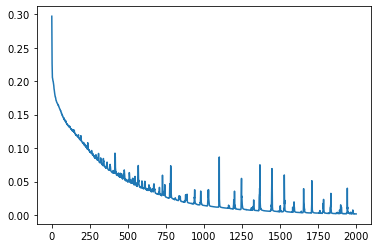

In [10]:
e = [h["epoch"] for h in history]
l = [h["train_loss"] for h in history]
plt.plot(e, l)
plt.show()

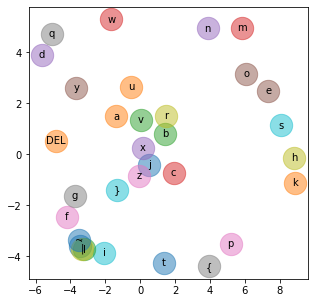

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for letra in data_dict.keys():
	arr = data_dict[letra]
	x, y = vae.encode(arr.reshape(-1))
	plt.scatter(x, y, label=letra, s=500, alpha=0.5, data=letra)
	plt.text(x, y, letra, ha="center", va="center", fontsize=10)
plt.show()

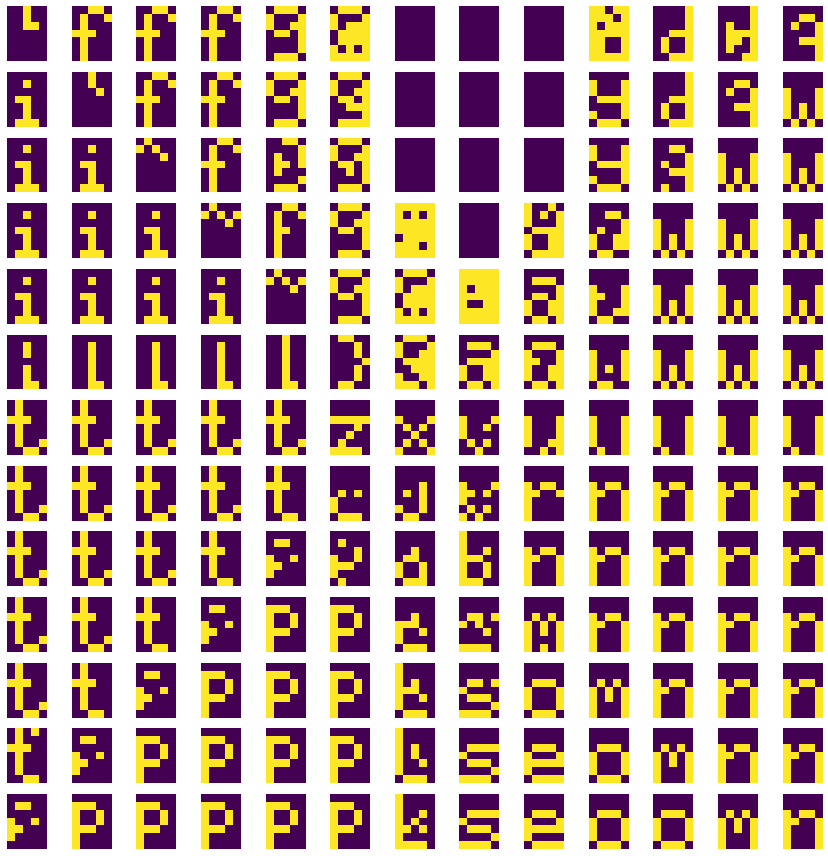

In [12]:
x = np.linspace(-6, 6, 13)
y = np.linspace(-6, 6, 13)

threshold = 0.5

fig, ax = plt.subplots(len(x), len(y), figsize=(12,12))
for i, xi in enumerate(x):
	for j, yj in enumerate(y):
		
		letra = vae.decode([xi, yj]) > threshold
		ax[i, j].imshow(letra.reshape(7, 5))
		ax[i, j].set_axis_off()

plt.tight_layout()
plt.show()